In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

# train_augu = shuffle(train_augu)
# train= shuffle(train)

Using TensorFlow backend.


In [0]:
augu1=pd.read_csv('/content/drive/My Drive/4_15/csv/augu1.csv')
augu1['image_path']='/content/drive/My Drive/4_15/Hokkaido-ml-challenge/augu/augu1/'+augu1['image_path']

augu2=pd.read_csv('/content/drive/My Drive/4_15/csv/augu2.csv')
augu2['image_path']='/content/drive/My Drive/4_15/Hokkaido-ml-challenge/augu/augu2/'+augu2['image_path']


train=pd.read_csv('/content/drive/My Drive/4_15/csv/train_snow.csv')
train['image_path']='/content/drive/My Drive/4_15/Hokkaido-ml-challenge/'+train['image_path']


train_augu=pd.concat([augu1,augu2,train],axis=0)
train_augu = shuffle(train_augu)
print(train_augu)

test=pd.read_csv('/content/drive/My Drive/4_15/csv/test_snow.csv')
test['image_path']='/content/drive/My Drive/4_15/Hokkaido-ml-challenge/'+test['image_path']
test.tail()

                                             image_path  snow_ratio
1012  /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.0000
588   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.0000
948   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.7840
502   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.9752
991   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.9979
...                                                 ...         ...
692   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.0000
2112  /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.1552
2489  /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.8816
444   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.1696
516   /content/drive/My Drive/4_15/Hokkaido-ml-chall...      0.0272

[4663 rows x 2 columns]


,image_path,snow_ratio
295,/content/drive/My Drive/4_15/Hokkaido-ml-chall...,0.9706
296,/content/drive/My Drive/4_15/Hokkaido-ml-chall...,0.7616
297,/content/drive/My Drive/4_15/Hokkaido-ml-chall...,0.9813
298,/content/drive/My Drive/4_15/Hokkaido-ml-chall...,0.9701
299,/content/drive/My Drive/4_15/Hokkaido-ml-chall...,0.7820


In [0]:
data_gen = ImageDataGenerator(validation_split=0.2,
                              rescale=1. / 255)
train_generator = data_gen.flow_from_dataframe(train_augu, directory=None, x_col='image_path', y_col='snow_ratio', 
                                              target_size = (256,192),class_mode='raw', 
                                              # shuffle=False,
                                              batch_size=64,subset='training')
valid_generator = data_gen.flow_from_dataframe(train_augu, directory=None, x_col='image_path', y_col='snow_ratio', 
                                              target_size = (256,192),class_mode='raw', 
                                              # shuffle=False,
                                              batch_size=64,subset='validation')

Found 3731 validated image filenames.
Found 932 validated image filenames.


In [0]:
data_gen = ImageDataGenerator(rescale=1. / 255)

test_generator = data_gen.flow_from_dataframe(test, directory=None, x_col='image_path', y_col='snow_ratio', 
                                              target_size = (256,192),class_mode='raw', 
                                              shuffle=False,
                                              batch_size=100)
one_generator = data_gen.flow_from_dataframe(test[:100], directory=None, x_col='image_path', y_col='snow_ratio', 
                                              target_size = (256,192),class_mode='raw', 
                                              shuffle=False,
                                              batch_size=100)
two_generator = data_gen.flow_from_dataframe(test[100:200], directory=None, x_col='image_path', y_col='snow_ratio', 
                                              target_size = (256,192),class_mode='raw', 
                                              shuffle=False,
                                              batch_size=100)
three_generator = data_gen.flow_from_dataframe(test[200:], directory=None, x_col='image_path', y_col='snow_ratio', 
                                              target_size = (256,192),class_mode='raw', 
                                              shuffle=False,
                                              batch_size=100)

Found 300 validated image filenames.
Found 100 validated image filenames.
Found 100 validated image filenames.
Found 100 validated image filenames.


In [0]:
from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Flatten
from keras import backend as K
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

def sAcc(y_true, y_pred):
    min=y_true-0.2
    max=y_true+0.2
    a=K.greater_equal(y_pred,min)
    b=K.less_equal(y_pred,max)
    c=K.equal(a,b)
    return K.mean(c)

In [0]:
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1000, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(20, activation='relu')(x)
x = Dense(20, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae',sAcc])

# model.summary()
# plot_model(model, to_file='snow_model.png', show_shapes=True)

filename = '/content/drive/My Drive/4_15/model/snowmModel_1.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_sAcc', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(train_generator,epochs=100,verbose=1,steps_per_epoch=60, validation_data=valid_generator,validation_steps=15,callbacks=[checkpoint])


Epoch 1/100
60/60 [==============================] - 96s 2s/step - loss: 0.1339 - mean_absolute_error: 0.3117 - sAcc: 0.3014 - val_loss: 0.0932 - val_mean_absolute_error: 0.2593 - val_sAcc: 0.3466

Epoch 00001: val_sAcc improved from -inf to 0.34657, saving model to /content/drive/My Drive/4_15/model/snowmModel_1.h5
Epoch 2/100
60/60 [==============================] - 57s 955ms/step - loss: 0.0619 - mean_absolute_error: 0.1676 - sAcc: 0.7220 - val_loss: 0.0726 - val_mean_absolute_error: 0.1562 - val_sAcc: 0.7607

Epoch 00002: val_sAcc improved from 0.34657 to 0.76073, saving model to /content/drive/My Drive/4_15/model/snowmModel_1.h5
Epoch 3/100
60/60 [==============================] - 65s 1s/step - loss: 0.0458 - mean_absolute_error: 0.1351 - sAcc: 0.8179 - val_loss: 0.0334 - val_mean_absolute_error: 0.1126 - val_sAcc: 0.8605

Epoch 00003: val_sAcc improved from 0.76073 to 0.86052, saving model to /content/drive/My Drive/4_15/model/snowmModel_1.h5
Epoch 4/100
60/60 [==================

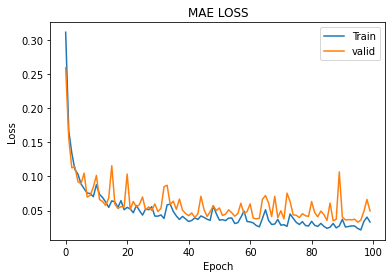

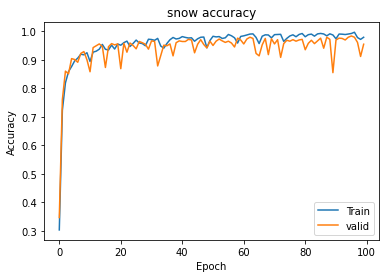

In [0]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MAE LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['sAcc'])
plt.plot(history.history['val_sAcc'])
plt.title('snow accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='lower right')
plt.show()

In [0]:
model = load_model('/content/drive/My Drive/4_15/model/snowModel_933.h5', custom_objects={'sAcc': sAcc} )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [0]:
score = model.evaluate_generator(generator=one_generator,steps=3, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print('mse loss:', score[0])
print('mae loss:', score[1])
print('snow accuracy:',score[2])

mse loss: 0.004862913396209478
mae loss: 0.012601297348737717
snow accuracy: 0.9900000095367432


In [0]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

for layer in model.layers[:14]:
   layer.trainable = False
for layer in model.layers[14:]:
   layer.trainable = True

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='mse',metrics=['mae',sAcc])

filename = '/content/drive/My Drive/4_15/model/snowModel_2.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_sAcc', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(train_generator,epochs=100,verbose=1,steps_per_epoch=60,
                    validation_data=valid_generator,validation_steps=15,callbacks=[checkpoint])



0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
Epoch 1/100
60/60 [==============================] - 64s 1s/step - loss: 0.0094 - mean_absolute_error: 0.0337 - sAcc: 0.9780 - val_loss: 0.0065 - val_mean_absolute_error: 0.0327 - val_sAcc: 0.9828

Epoch 00001: val_sAcc improved from -inf to 0.98283, saving model to /content/drive/My Drive/4_15/model/snowModel_2.h5
Epoch 2/100
60/60 [==============================] - 59s 984ms/step - loss: 0.0037 - mean_absolute_error: 0.0238 - sAcc: 0.9924 - val_loss: 0.0062 - val_mean_absolute_error: 0.0318 - val_sAcc: 0.9850

Epoch 00002: val_sAcc improved from 0.98283 to 0.98498, saving model to /content/drive/My Drive/4_15/model/snowModel_2.h5
Epoch 3/100
60/60 [==============================] - 61s 1s/step - loss: 0.0

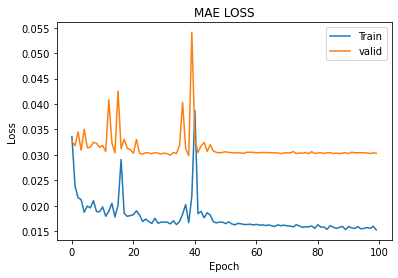

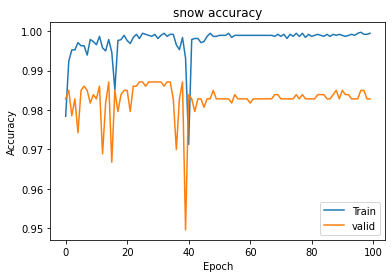

In [0]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MAE LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['sAcc'])
plt.plot(history.history['val_sAcc'])
plt.title('snow accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='lower right')
plt.show()

In [0]:
model = load_model('/content/drive/My Drive/4_15/model/vgg16_model.h5', custom_objects={'sAcc': sAcc} )

In [0]:
score = model.evaluate_generator(generator=three_generator,steps=3, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print('mse loss:', score[0])
print('mae loss:', score[1])
print('snow accuracy:',score[2])

mse loss: 0.04183744266629219
mae loss: 0.10384456813335419
snow accuracy: 0.8899999856948853


In [0]:
model.save('/content/drive/My Drive/4_15/model/snowModel_933.h5')

In [0]:
pred = model.predict_generator(test_generator, steps=1, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
pred